In [1]:
from sklearn.datasets import load_digits
digits = load_digits() # 손글씨 숫자 데이터셋

In [4]:
from sklearn.cluster import KMeans

# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ , random 기본값 랜덤으로 선택
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_ # 분류결과
print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  1.66533454e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   2.60208521e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   1.30104261e-18  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  1.38777878e-17
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -5.55111512e-17
   1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

In [5]:
import matplotlib.pyplot as plt
def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1


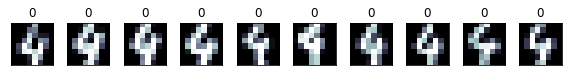

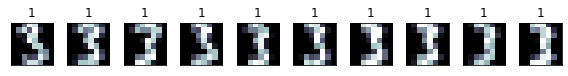

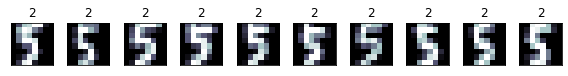

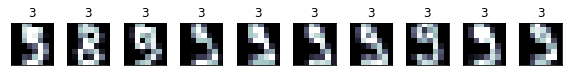

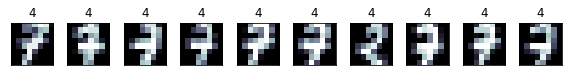

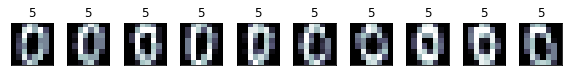

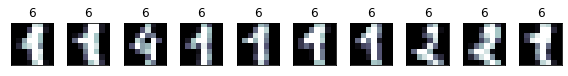

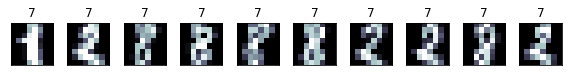

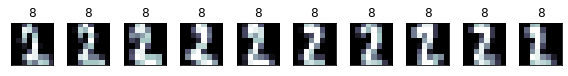

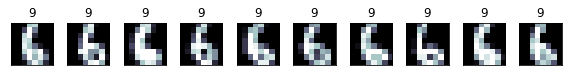

In [6]:
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
for i in range(10):
    show_cluster(digits.images, y_pred, i)
#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]], dtype=int64)

In [24]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18251916424600556

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


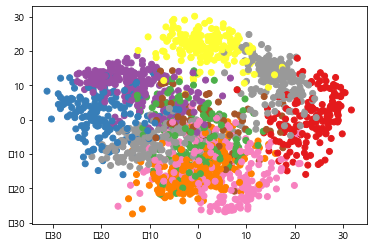

In [25]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA
# 주성분 분석, 자원 축소
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()